In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv('Tweets.csv')

# Select relevant columns
df = df[['text', 'airline_sentiment']]


In [19]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_text'] = df['text'].apply(clean_text)


In [20]:
# Mapping sentiment labels to numbers
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment'] = df['airline_sentiment'].map(sentiment_mapping)


In [22]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [24]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [25]:
# Predict on test set
y_pred = model.predict(X_test_tfidf)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.7408
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1889
           1       0.73      0.23      0.35       580
           2       0.88      0.38      0.53       459

    accuracy                           0.74      2928
   macro avg       0.78      0.53      0.58      2928
weighted avg       0.75      0.74      0.69      2928



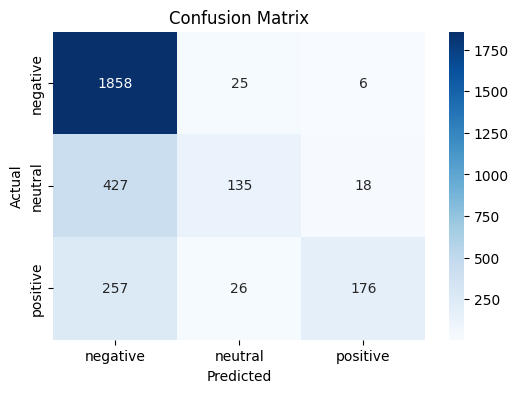

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
